In [1]:
import xarray as xr
import pandas as pd
from utilities.plotting import *
from utilities.utils import *

In [2]:
gas_costs = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
         120, 140, 160, 180, 200, 
         220, 240, 260, 280, 300,
         320, 340, 360, 380, 400,
         420, 440, 460, 480, 500]

country_cell_dict = {
    'United States of America': ['-118.75°,35.75°', 50],
    'Germany': ['8.75°,48.25°', 50],
    'China': ['96.25°,38.25°', 50],
    'Saudi Arabia': ['48.75°,28.25°', 50]
}

countries = ['United States of America', 'Germany', 'China', 'Saudi Arabia']
colors = sns.color_palette("rocket", as_cmap=True)(np.linspace(0, 1, int(len(countries))*2)[2:])
case = 'CST_storage'
output_path = 'output_data/cst_storage'

In [3]:
vars_dict = {'capacity_natgas': None, 'natgas_fuel_use': None, 'capacity_cst': None, 'cs_fraction': None, 'storage_ratio': None, 'system_cost': None}

for var in vars_dict.keys():
    variable_df = pd.DataFrame()
    for gas_cost in gas_costs:
        masked_dataset = xr.open_dataset(f'{output_path}/maps/{var}_{case}_gas{gas_cost}.nc')

        variable_df = calculate_country_median(variable_df, masked_dataset, var, countries, country_cell_dict, gas_cost)
    vars_dict[var] = variable_df

plotting_variables_df = pd.concat(
    [vars_dict[k] if i == 0 else vars_dict[k].drop(columns=['country', 'gas cost']) 
     for i, k in enumerate(vars_dict)], 
    axis=1
)

In [4]:
# Save the DataFrame to a CSV file
if not os.path.exists(f'{output_path}/plotting_variables'):
    os.makedirs(f'{output_path}/plotting_variables')
plotting_variables_df.to_csv(f'{output_path}/plotting_variables/plotting_variables_df.csv', index=False)

In [23]:
# Print capacity_natgas and natgas_fuel_use at $100 fuel cost for all four countries
print(plotting_variables_df[['country', 'median capacity_natgas', 'median natgas_fuel_use']].loc[plotting_variables_df['gas cost'] == 200])

                     country  median capacity_natgas  median natgas_fuel_use
60  United States of America                0.828085                0.151837
61                   Germany                0.983775                0.461033
62                     China                0.731850                0.125774
63              Saudi Arabia                0.646180                0.041634


In [5]:
# for var in ['capacity_natgas', 'natgas_fuel_use', 'capacities', 'storage_ratio', 'cs_fraction', 'co2_emissions']:
#     for ic,country in enumerate(countries):
#         plot_line(plotting_variables_df, country, colors[ic], var)

In [6]:
# for frac_threshold in ['0p0', '0p5']:
#     plot_result_map(f'{output_path}/maps/gas_price_min_frac_CST_storage_threshold{frac_threshold}.nc', 'CST_storage', f'Concentrated solar thermal fraction >{float(frac_threshold.replace("p","."))*100}%', 'Gas fuel price ($/MWh)')

In [7]:
# for gas_cost in [50, 500]:
#     plot_result_map(f'{output_path}/maps/cs_fraction_CST_storage_gas{gas_cost}.nc', 'CST_storage', f'Gas fuel cost = ${gas_cost}/MWh', 'Fraction of demand met with concentrated solar')

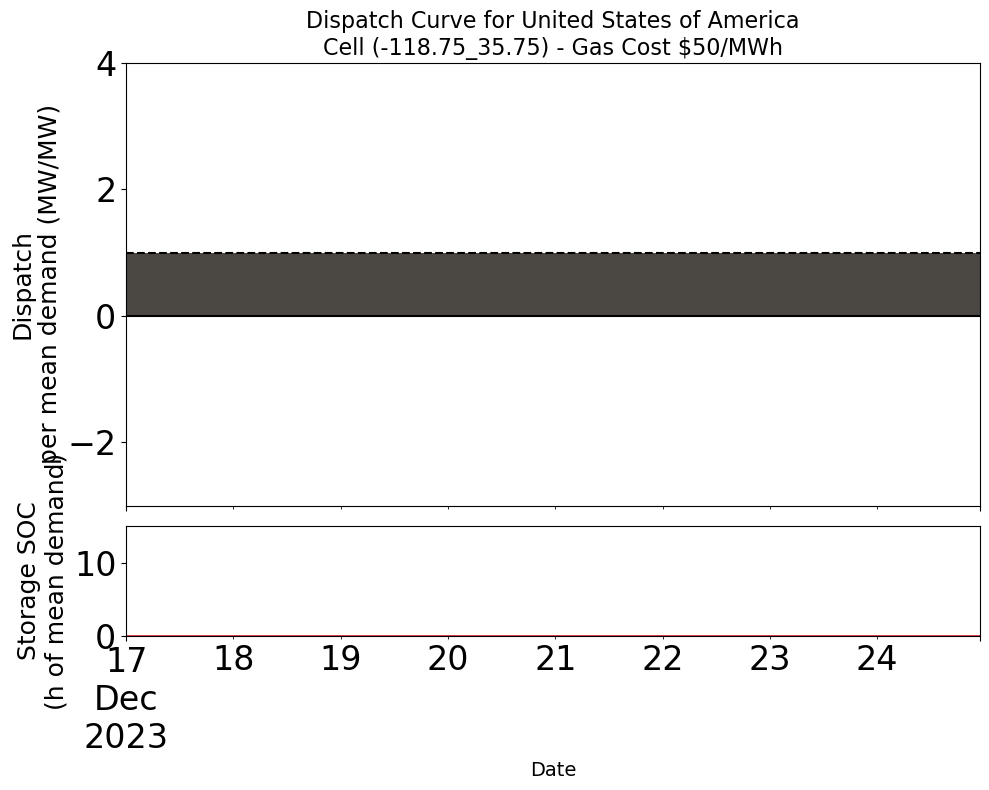

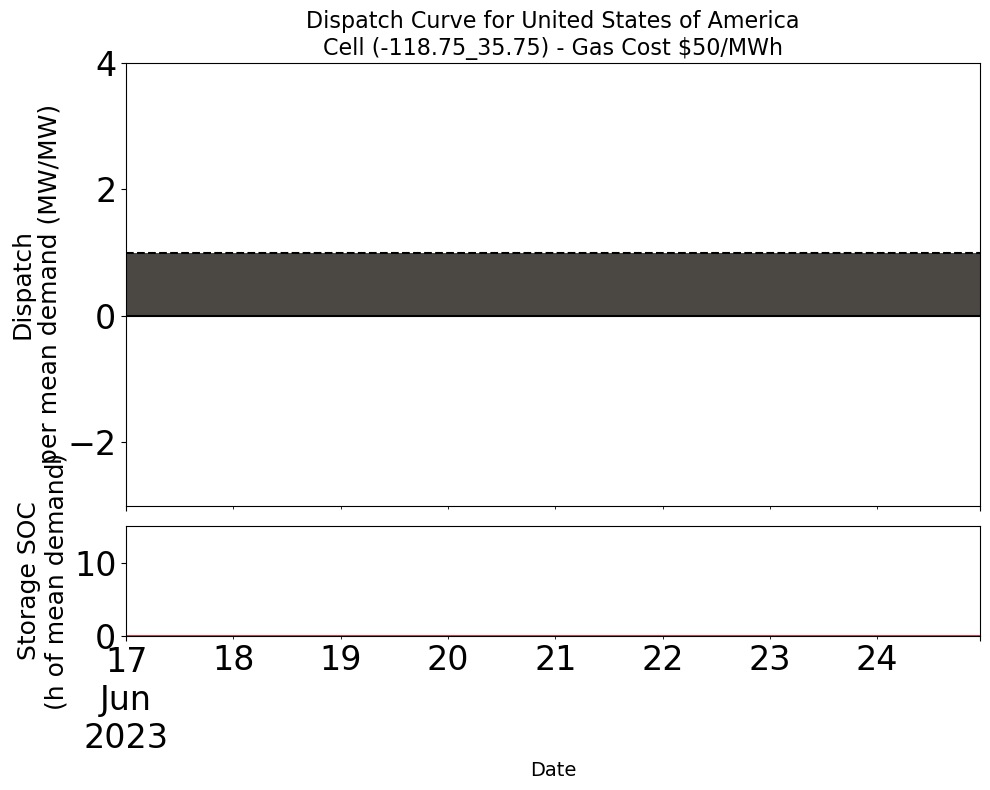

<Figure size 600x400 with 0 Axes>

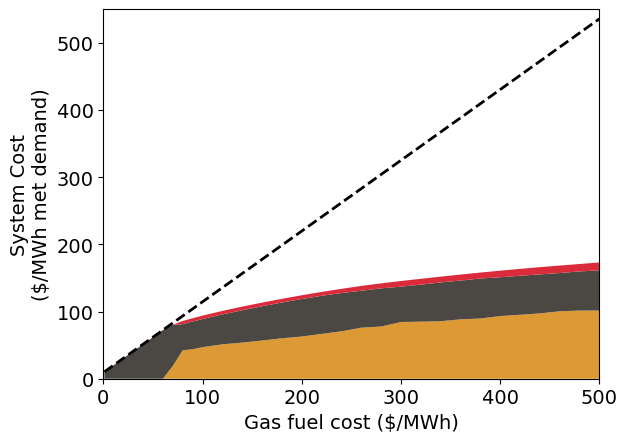

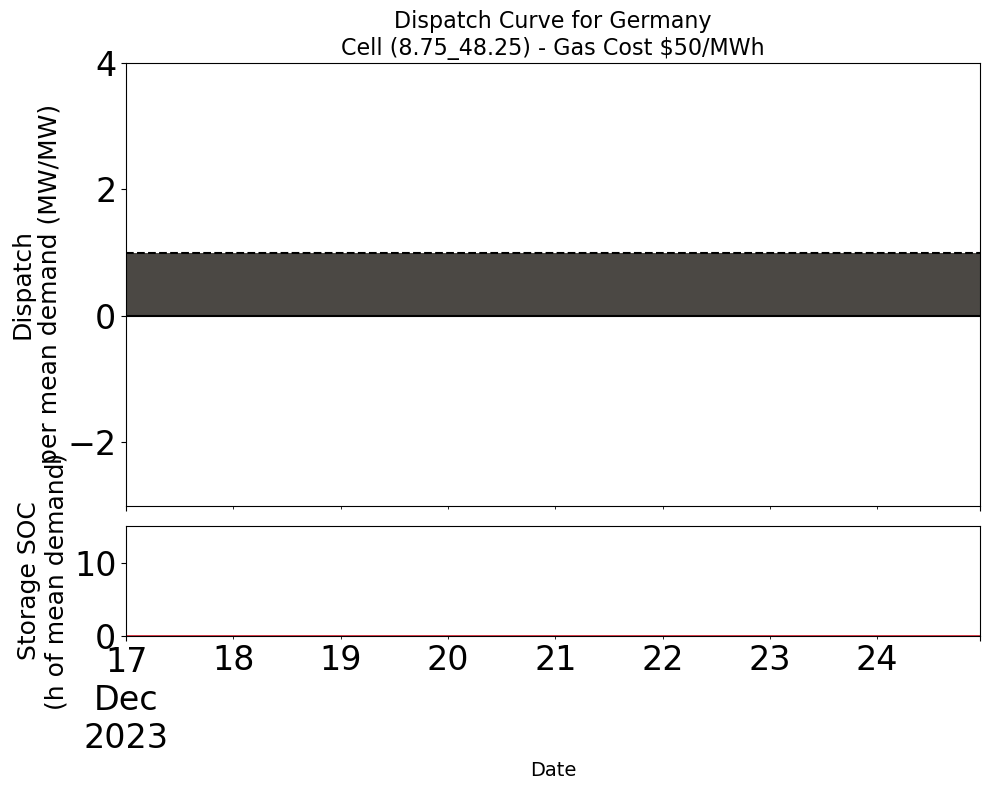

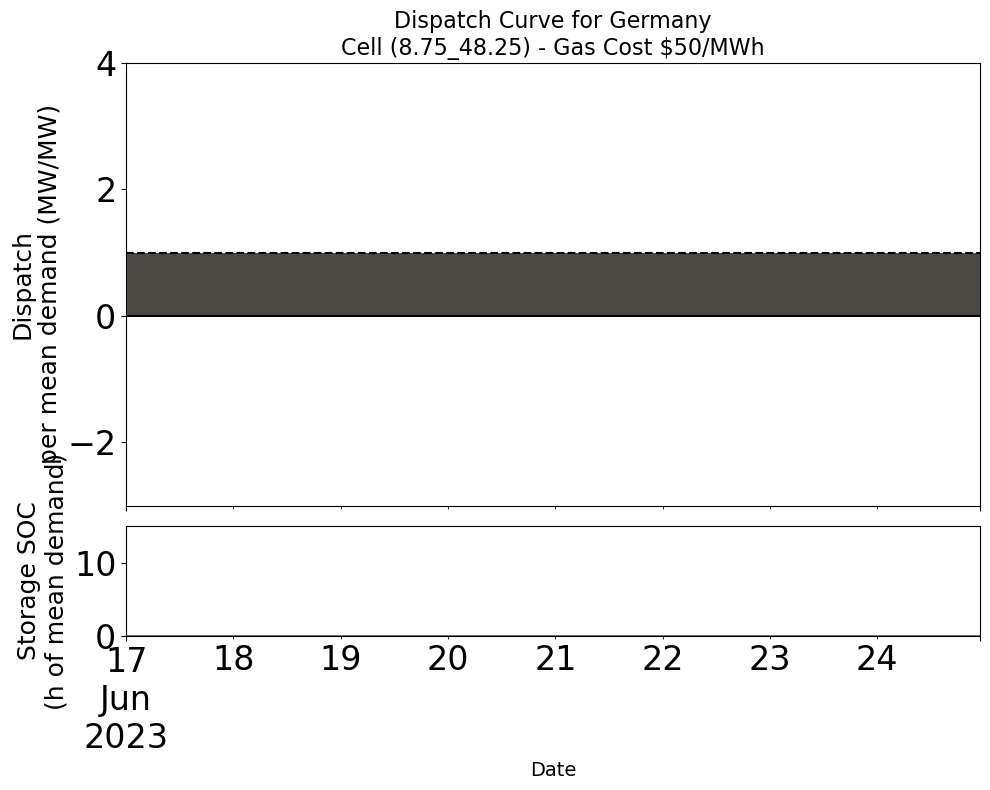

<Figure size 600x400 with 0 Axes>

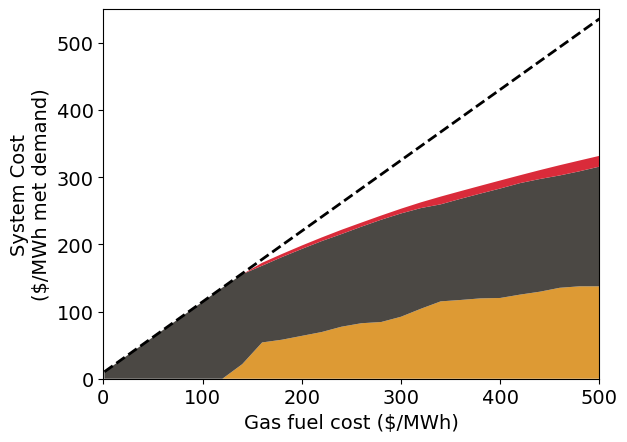

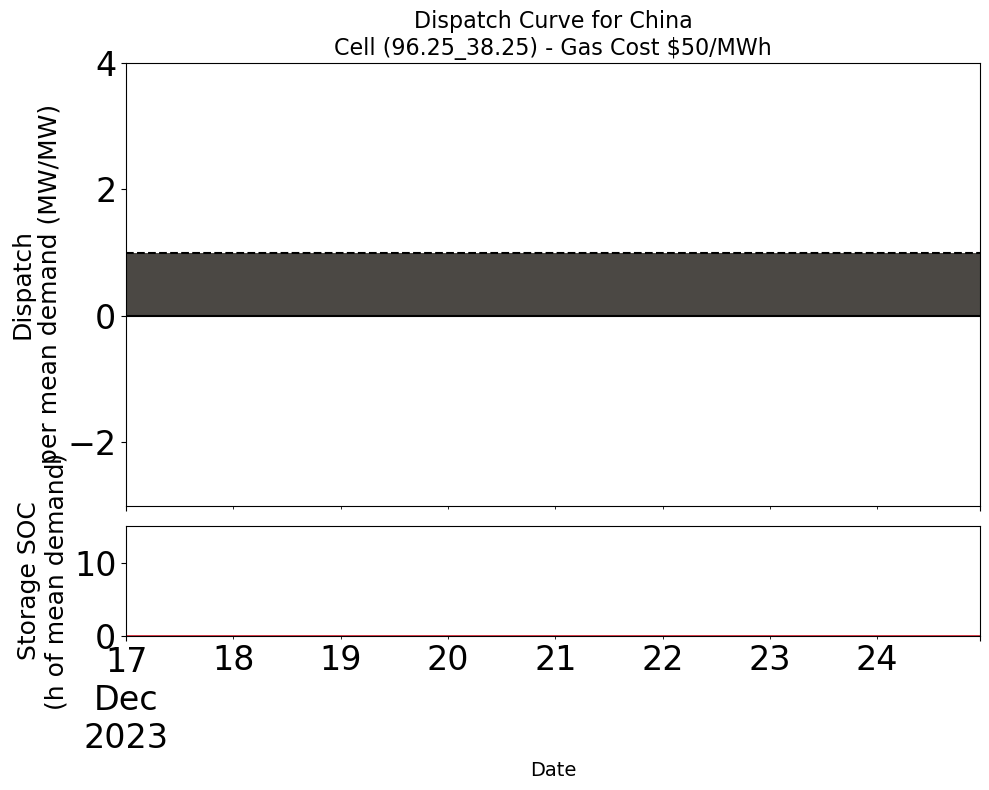

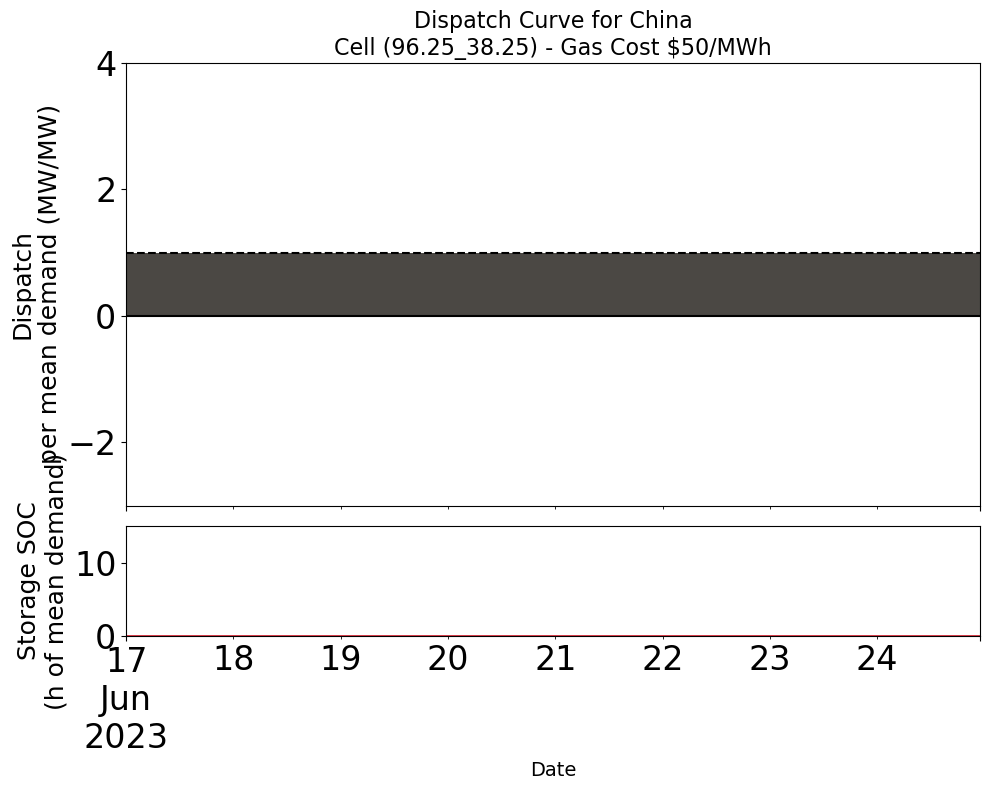

<Figure size 600x400 with 0 Axes>

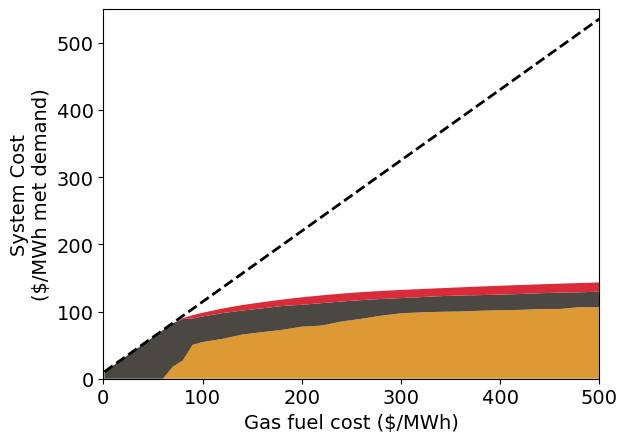

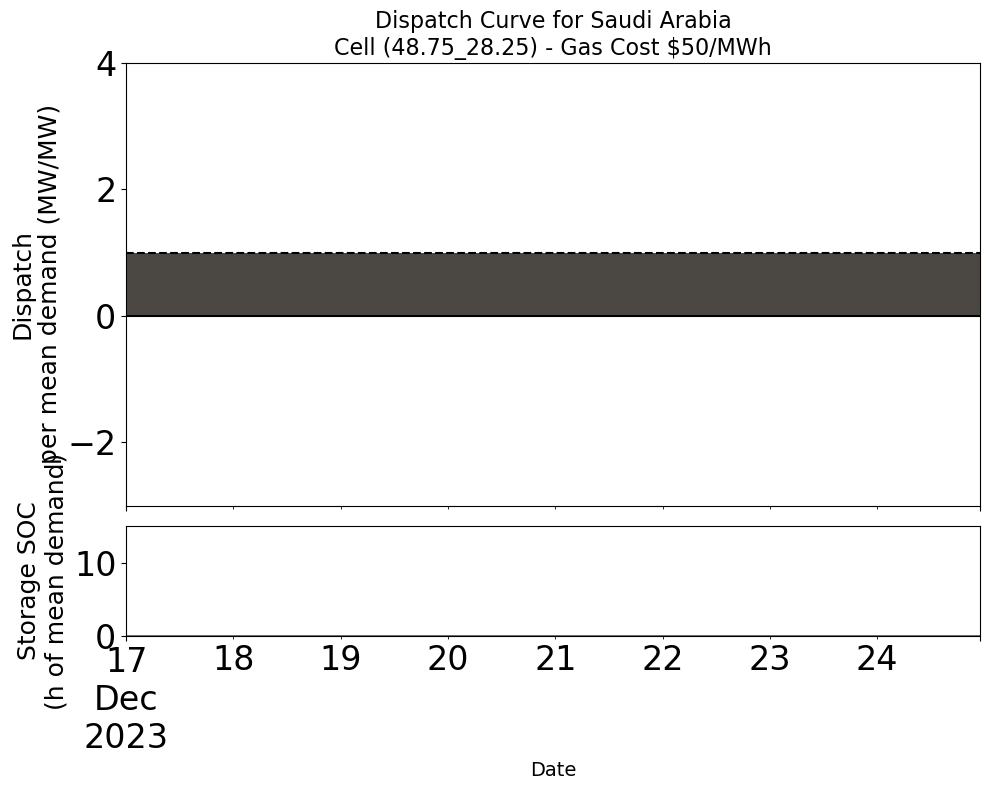

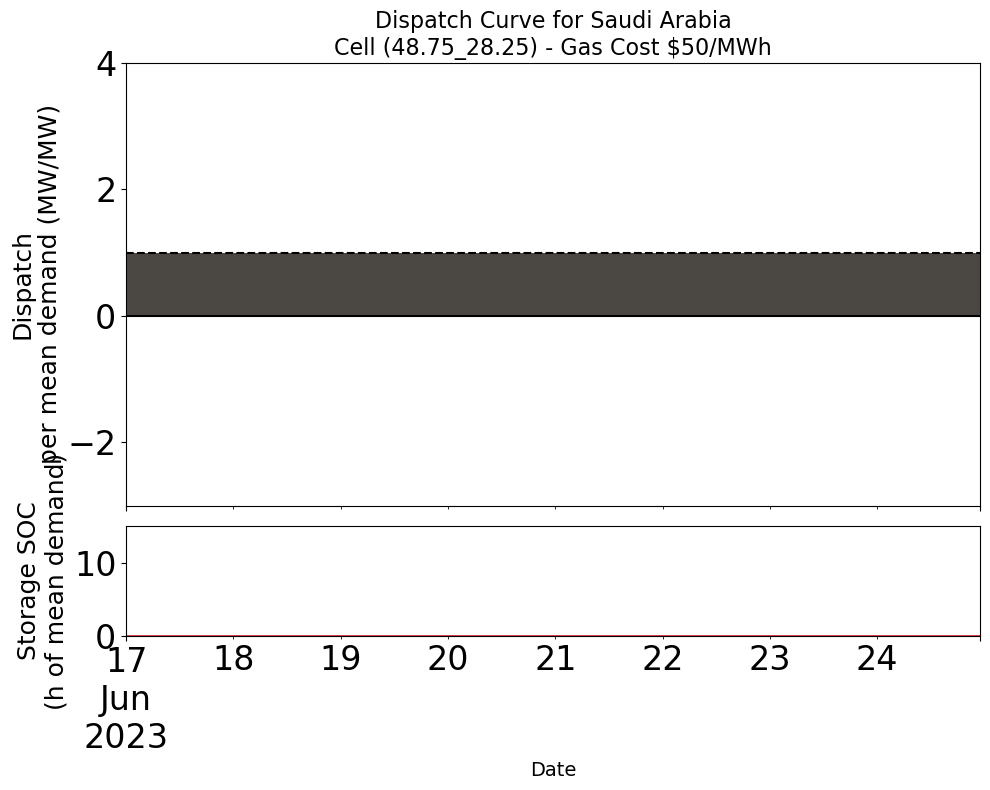

<Figure size 600x400 with 0 Axes>

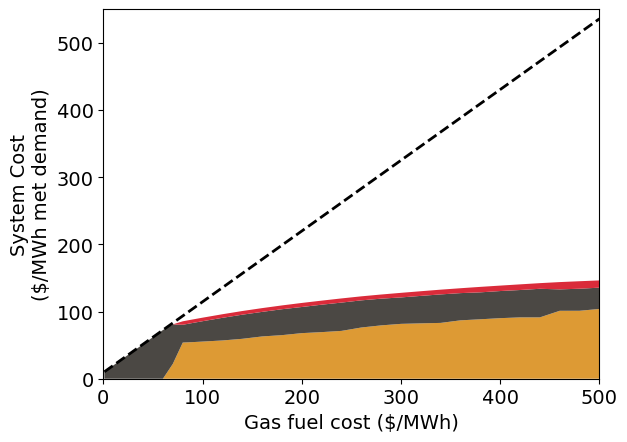

In [8]:
for country in country_cell_dict.keys():
    plot_dispatch_curve(output_path, country, country_cell_dict[country][0].replace("°","").replace(",","_"), country_cell_dict[country][1], month='12')
    plot_dispatch_curve(output_path, country, country_cell_dict[country][0].replace("°","").replace(",","_"), country_cell_dict[country][1], month='06')

    gas_cost_dict, total_system_cost_dict = plot_system_cost_share(output_path, country, country_cell_dict[country][0].replace("°","").replace(",","_"), gas_costs)

In [9]:
# for country in country_cell_dict.keys():
#     calculate_co2_abatement_cost(country, plotting_variables_df, gas_cost_dict, total_system_cost_dict, gas_cost=50)

In [10]:
# for country in country_cell_dict.keys():
#     calculate_co2_abatement_cost(country, plotting_variables_df, gas_cost_dict, total_system_cost_dict, gas_cost=100)